In [1]:
#Bike Sharing Project
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#load hourly data
hourly_data = pd.read_csv("D:\Datasets\Bike sharing Dataset\hour.csv")

In [3]:
#General Statistics of the data
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:{hourly_data.isnull().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data:instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [4]:
hourly_data.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

In [9]:
#temporal features: This contains information about the time at which the record was registered. This group contains the dteday, season, yr, mnth, hr, holiday, weekday, and workingday columns.
#weather related features: This contains information about the weather conditions. The weathersit, temp, atemp, hum, and windspeed columns are included in this group.
#record related features: This contains information about the number of records for the specific hour and date. This group includes the casual, registered, and cnt columns.
#Instant column is avoided because it is index

In [5]:
#creating a copy of the orginal
preprocessed_data=hourly_data.copy()

In [6]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

In [7]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

In [8]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday',3: 'Wednesday', 4: 'Thursday', 5: 'Friday',6: 'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

In [9]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy',3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x:weather_mapping[x])

In [10]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67

In [11]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday','weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

season    yr    weekday       weathersit   hum  windspeed
5792   summer  2011   Saturday            clear  74.0     8.9981
7823     fall  2011     Sunday            clear  43.0    31.0009
15426    fall  2012    Tuesday           cloudy  77.0     6.0032
15028    fall  2012     Sunday            clear  51.0    22.0028
12290  spring  2012     Friday           cloudy  89.0    12.9980
3262   spring  2011     Friday            clear  64.0     7.0015
10763  spring  2012   Thursday            clear  42.0    23.9994
12384  spring  2012    Tuesday  light_rain_snow  82.0    11.0014
6051   summer  2011  Wednesday            clear  52.0    19.0012
948    winter  2011   Saturday            clear  80.0     0.0000

In [12]:
"""
assert that total number of rides is equal to the sum of registered and casual ones
"""
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(),'Sum of casual and registered rides not equal ''to total number of rides'

C:\Users\thahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rides distributions')

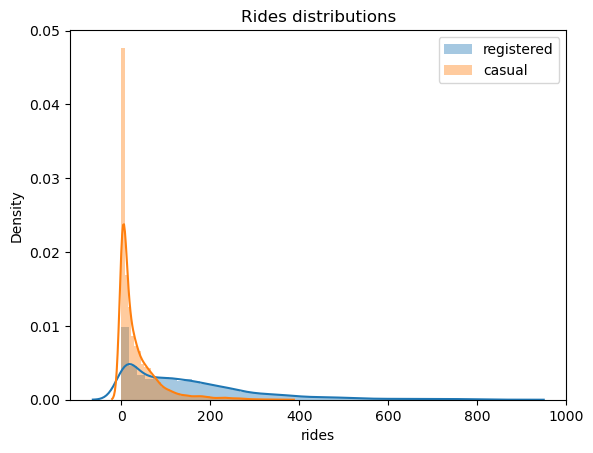

In [13]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")

In [14]:
#Conclusion registered users are more then casual ones

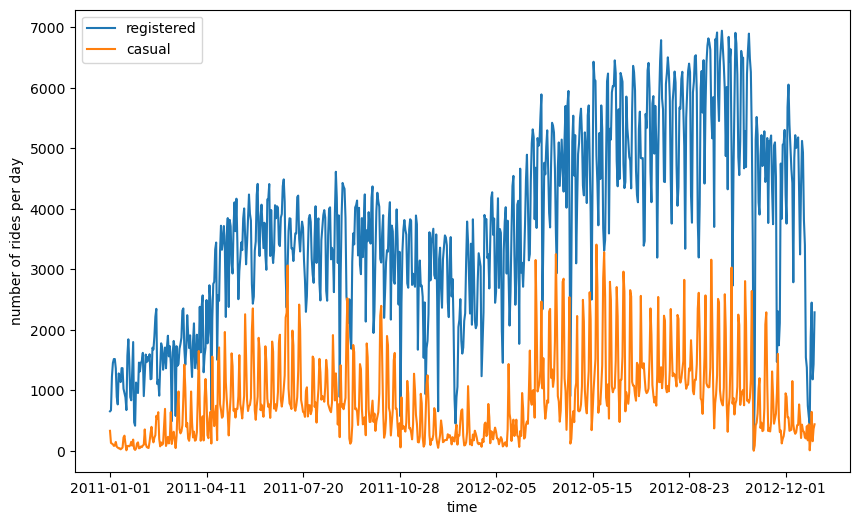

In [15]:
# ploting evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

In [16]:
"""
As you can see from the preceding figure, the number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore,
we can observe that during winter, the overall number of rides decreases (which is totally in line with our expectations,
as bad weather and low temperatures have a negative impact on ride sharing services).
"""

'\nAs you can see from the preceding figure, the number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore,\nwe can observe that during winter, the overall number of rides decreases (which is totally in line with our expectations,\nas bad weather and low temperatures have a negative impact on ride sharing services).\n'

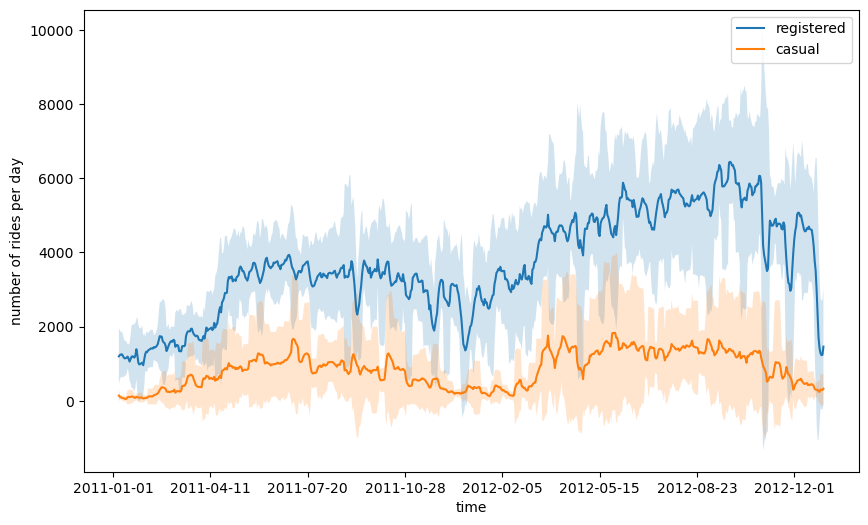

In [17]:
"""
Create new dataframe with necessary for plotting columns, and obtain number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling means, then we color the zone between the series of rolling means +- 2 rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_deviations['registered'], \
                rolling_means['registered'] \
                - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_deviations['casual'], \
                rolling_means['casual'] \
                - 2*rolling_deviations['casual'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

C:\Users\thahi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


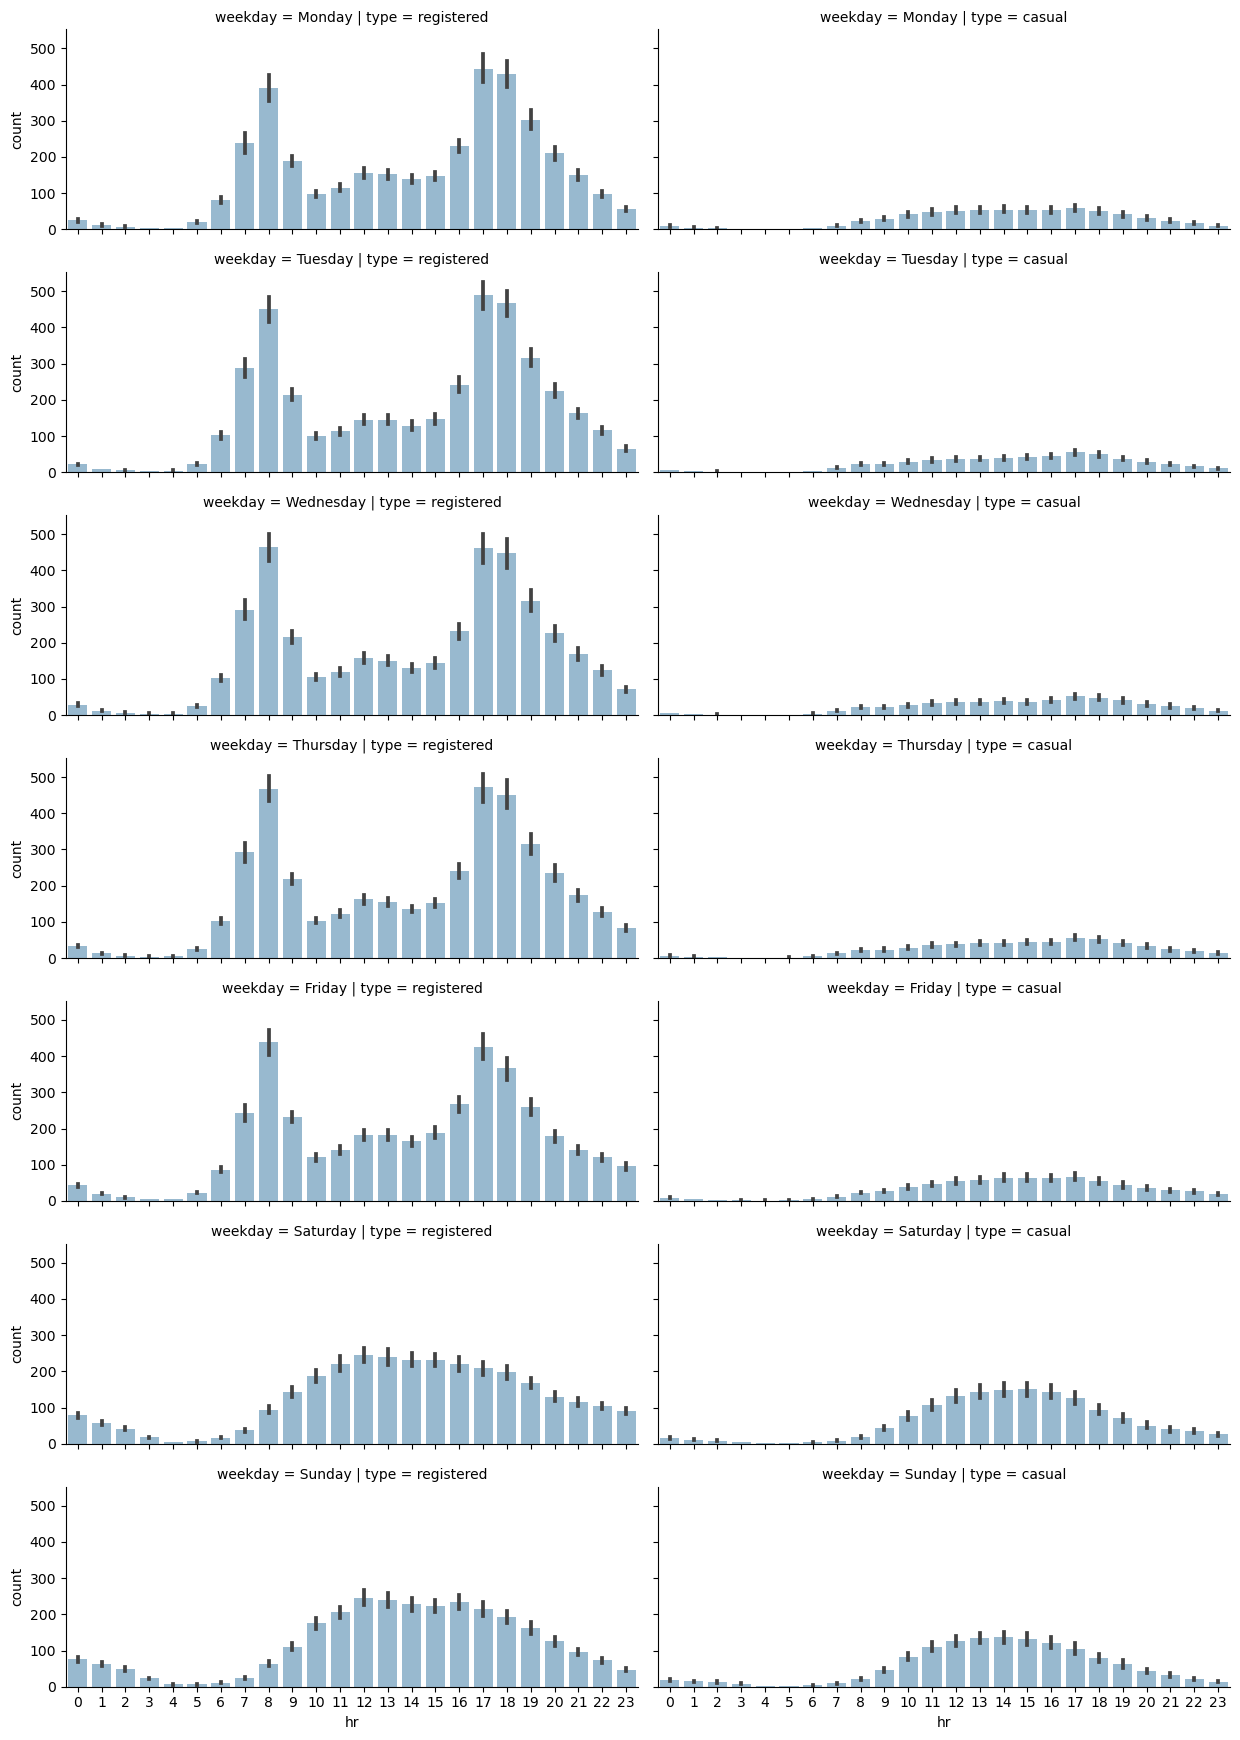

In [18]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]
"""
transform the data into a format, in number of entries are computed as count, 
for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], \
                           var_name='type', value_name='count')
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', \
                     col='type', height=2.5, aspect=2.5, \
                     row_order=['Monday', 'Tuesday', \
                                'Wednesday', 'Thursday', \
                                'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

In [19]:
"""
We can immediately note that on working days, the highest number of rides for registered users takes place around 8 AM and at 6 PM. This is totally in line with our expectations,
as it is likely that most registered users use the bike sharing service for commuting. On the other hand, the casual usage of bike sharing services on working days is quite limited, as the
 plot shows.
During the weekend, we can see that ride distributions change for both casual and registered users. Still, registered rides are more frequent than casual ones, 
but both the distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM.
As a conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5):
"""

'\nWe can immediately note that on working days, the highest number of rides for registered users takes place around 8 AM and at 6 PM. This is totally in line with our expectations,\nas it is likely that most registered users use the bike sharing service for commuting. On the other hand, the casual usage of bike sharing services on working days is quite limited, as the\n plot shows.\nDuring the weekend, we can see that ride distributions change for both casual and registered users. Still, registered rides are more frequent than casual ones, \nbut both the distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM.\nAs a conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5):\n'

In [20]:
# select subset of the data
plot_data = preprocessed_data[['hr', 'season','registered', 'casual']]

In [21]:
# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'],var_name='type', value_name='count')

C:\Users\thahi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


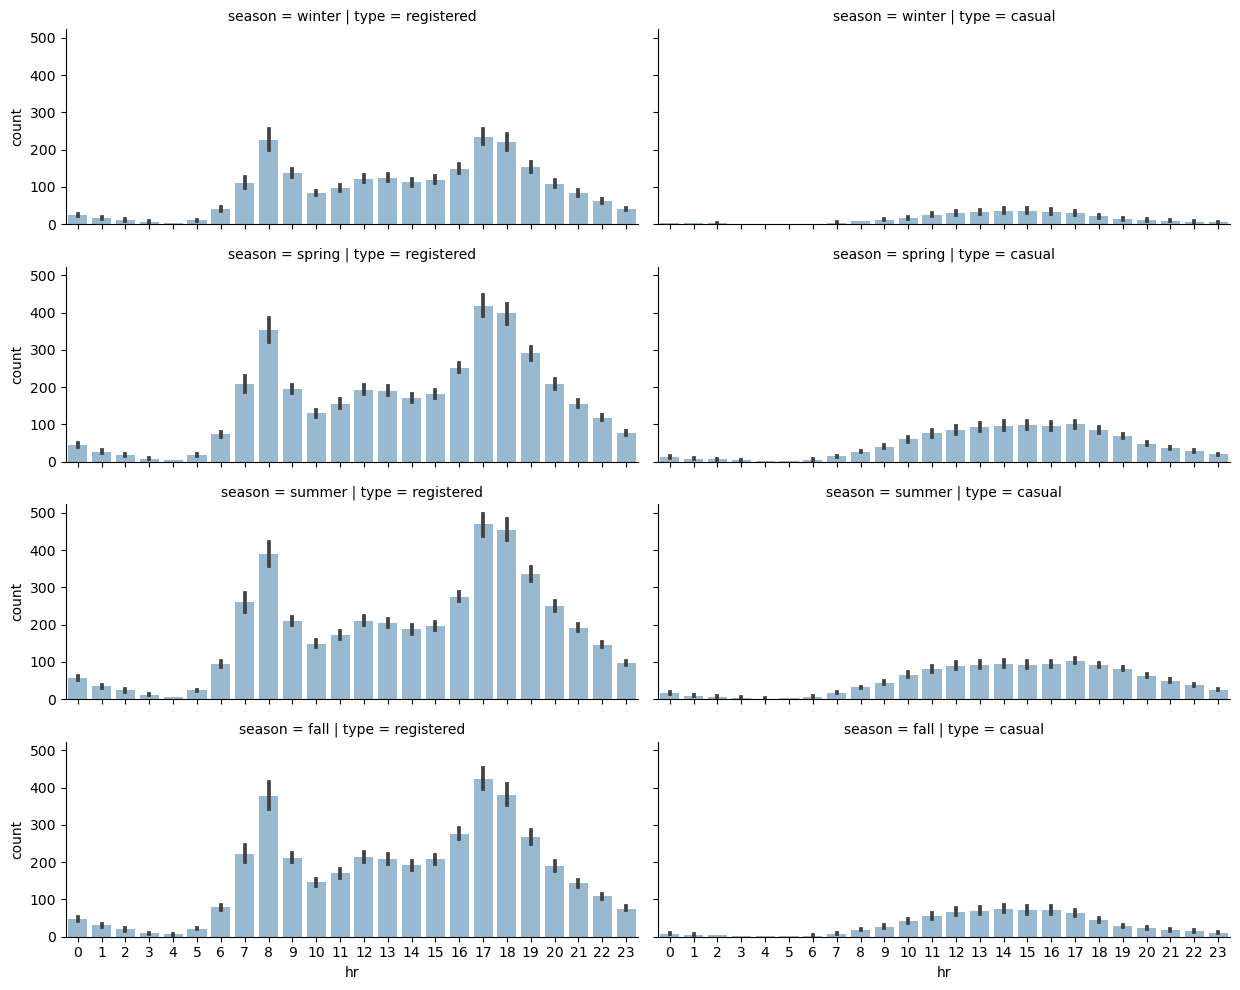

In [22]:
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season',col='type', height=2.5,aspect=2.5,row_order=['winter', 'spring','summer', 'fall'])
# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

In [23]:
"""
The distribution of rides on a seasonal level
As can be seen in the plot, while each season has a similar graph shape, the count is lower for the winter graph. So there are fewer rides (registered and casual) during winter.
This makes sense, as fewer rides are likely to occur when the weather conditions are poor.
"""

'\nThe distribution of rides on a seasonal level\nAs can be seen in the plot, while each season has a similar graph shape, the count is lower for the winter graph. So there are fewer rides (registered and casual) during winter.\nThis makes sense, as fewer rides are likely to occur when the weather conditions are poor.\n'

In [24]:
plot_data = preprocessed_data[['weekday', 'season','registered', 'casual']]

In [25]:
plot_data = plot_data.melt(id_vars=['weekday', 'season'],var_name='type', value_name='count')

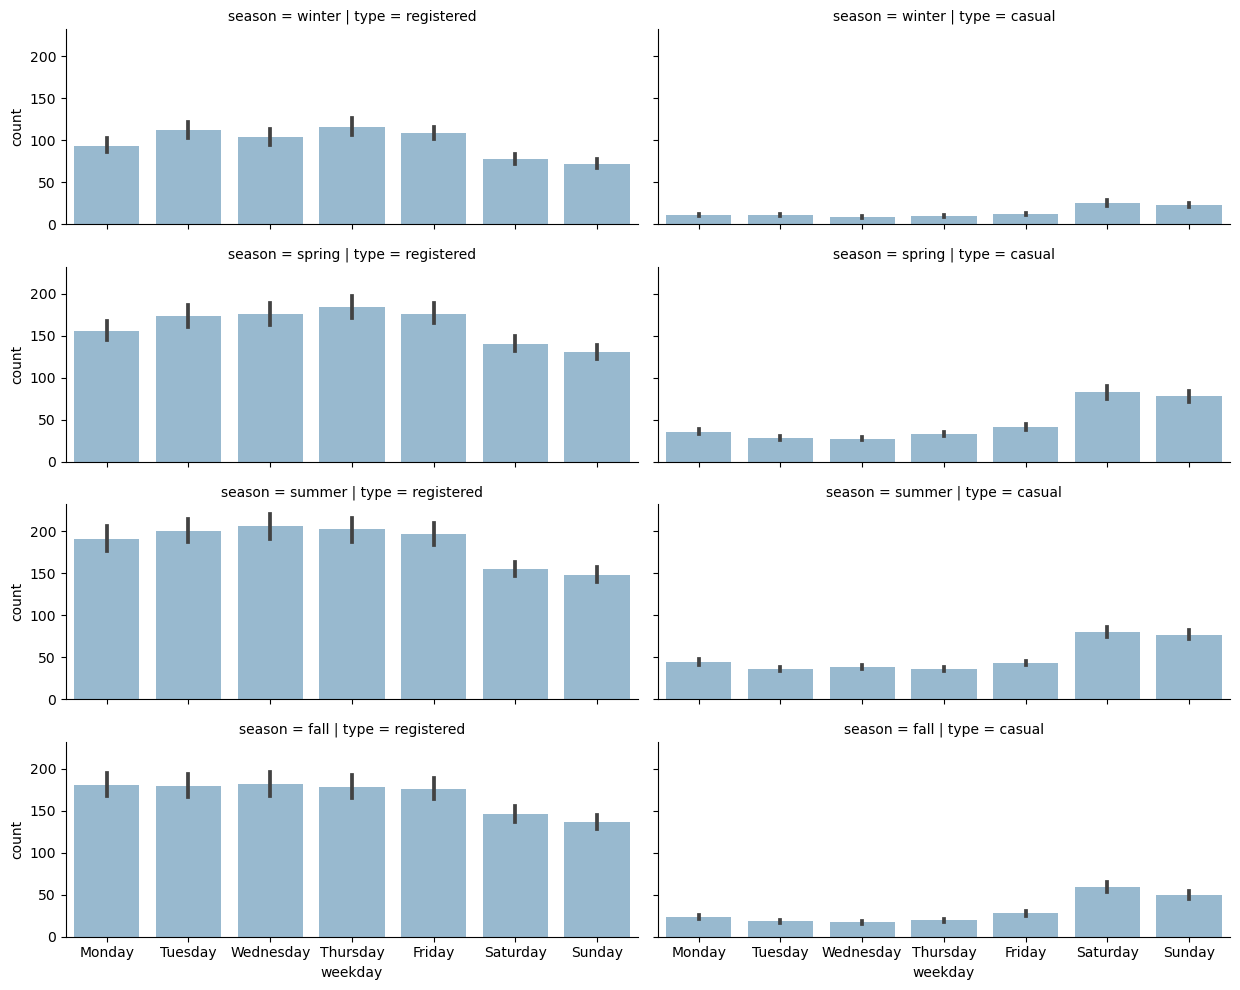

In [26]:
grid = sns.FacetGrid(plot_data, row='season', col='type',height=2.5, aspect=2.5,row_order=['winter', 'spring','summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])

In [27]:
"""
There is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides increases.
This could enforce our initial hypothesis, that is, that registered customers mostly use the bike sharing service for commuting 
(which could be the reason for the decreasing number of registered rides over the weekend), while casual customers use the service occasionally over the weekend according to observations.
"""

'\nThere is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides increases.\nThis could enforce our initial hypothesis, that is, that registered customers mostly use the bike sharing service for commuting \n(which could be the reason for the decreasing number of registered rides over the weekend), while casual customers use the service occasionally over the weekend according to observations.\n'

In [28]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()

In [29]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season== "summer")& (preprocessed_data.yr == 2011)].registered

In [30]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]},p-value: {test_result[1]}")

Test statistic: -3.4919691483786197,p-value: 0.0004887645279519505


In [31]:
"""
The result of the previous test returns a p-value smaller than 0.001, which is less than the predefined critical value.
Therefore, you can reject the null hypothesis and assume that the alternative hypothesis is correct.
"""

'\nThe result of the previous test returns a p-value smaller than 0.001, which is less than the predefined critical value.\nTherefore, you can reject the null hypothesis and assume that the alternative hypothesis is correct.\n'

In [32]:
"""
Observation:We computed the average number of rides on the true population; therefore, the value computed by the statistical test should be the same. So why have we rejected the null hypothesis?
The answer to that question lies in the fact that your sample is not a true representation of the population, but rather a biased one.
In fact, you selected only entries from the summer of 2011. Therefore, neither data from the full year is present, nor entries from 2012. 

In order to show how such mistakes can compromise the results of statistical tests, perform the test again, but this time taking as a sample 5% of the registered rides (selected randomly).
"""

'\nObservation:We computed the average number of rides on the true population; therefore, the value computed by the statistical test should be the same. So why have we rejected the null hypothesis?\nThe answer to that question lies in the fact that your sample is not a true representation of the population, but rather a biased one.\nIn fact, you selected only entries from the summer of 2011. Therefore, neither data from the full year is present, nor entries from 2012. \n\nIn order to show how such mistakes can compromise the results of statistical tests, perform the test again, but this time taking as a sample 5% of the registered rides (selected randomly).\n'

In [33]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased,population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]},p-value: {test_result_unbiased[1]}")

Unbiased test statistic: 0.28389500367068127,p-value: 0.7765585494400788


In [34]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

In [35]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f},p-value: {test_res[1]:.03f}")

Statistic value: -16.004,p-value: 0.000


C:\Users\thahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Registered rides distributions')

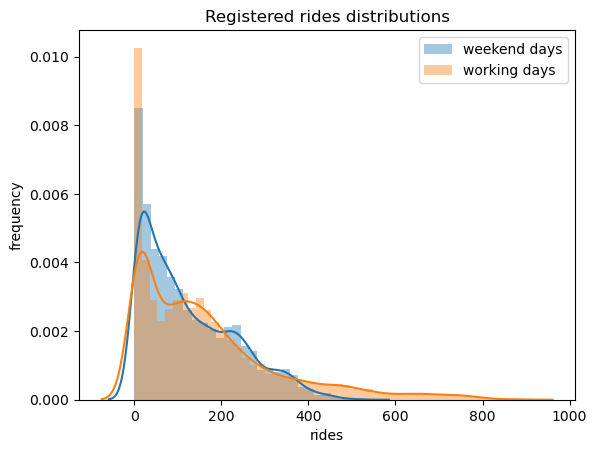

In [36]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")

In [37]:
"""
Perform the same type of hypothesis testing to validate the second assumption from the last section— that is, casual users perform more rides during the weekend. 
In this case, the null hypothesis is that the average number of rides during working days is the same as the average number of rides during the weekend, both performed only by casual customers. 
The alternative hypothesis will then result in a statistically significant difference in the average number of rides between the two groups:
"""

'\nPerform the same type of hypothesis testing to validate the second assumption from the last section— that is, casual users perform more rides during the weekend. \nIn this case, the null hypothesis is that the average number of rides during working days is the same as the average number of rides during the weekend, both performed only by casual customers. \nThe alternative hypothesis will then result in a statistically significant difference in the average number of rides between the two groups:\n'

Statistic value: 41.077, p-value: 0.000


C:\Users\thahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Casual rides distributions')

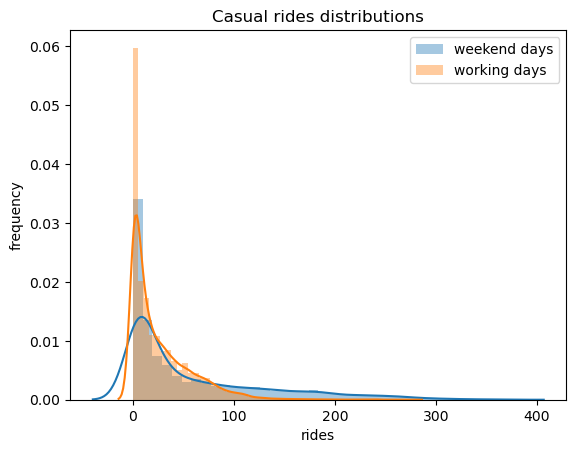

In [38]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]

# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")

# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")

In [39]:
"""
The p-value returned from the previous code snippet is 0, which is strong evidence against the null hypothesis. 
Hence, we can conclude that casual customers also behave differently over the weekend (in this case, they tend to use the bike sharing service more) 
"""

'\nThe p-value returned from the previous code snippet is 0, which is strong evidence against the null hypothesis. \nHence, we can conclude that casual customers also behave differently over the weekend (in this case, they tend to use the bike sharing service more) \n'

In [40]:
"""
temp: This is the normalized temperature in Celsius. Values are divided by 41, which means that the highest registered temperature in the data is 41°C (corresponding to 1 in our dataset).
atemp: The normalized feeling temperature in Celsius. Values are divided by 50, which means that the highest registered temperature in the data is 50°C (corresponding to 1 in our dataset).
hum: The humidity level as a percentage.
windspeed: The wind speed in m/s.
"""

'\ntemp: This is the normalized temperature in Celsius. Values are divided by 41, which means that the highest registered temperature in the data is 41°C (corresponding to 1 in our dataset).\natemp: The normalized feeling temperature in Celsius. Values are divided by 50, which means that the highest registered temperature in the data is 50°C (corresponding to 1 in our dataset).\nhum: The humidity level as a percentage.\nwindspeed: The wind speed in m/s.\n'

In [41]:
def plot_correlations(data, col):
# get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Registered rides \
                     (correlation: {corr_r:.3f})")
# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Casual rides (correlation: {corr_c:.3f})")
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

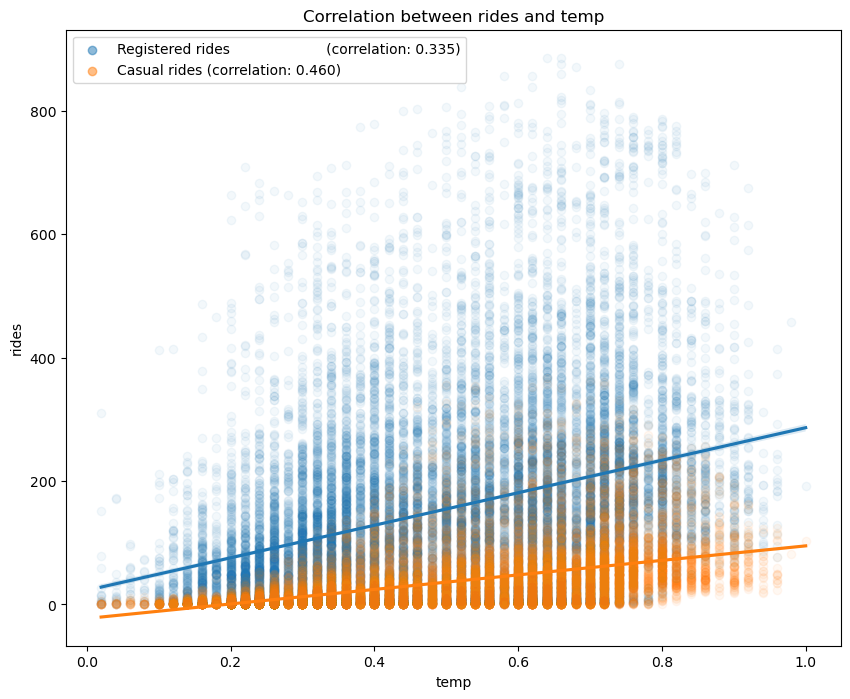

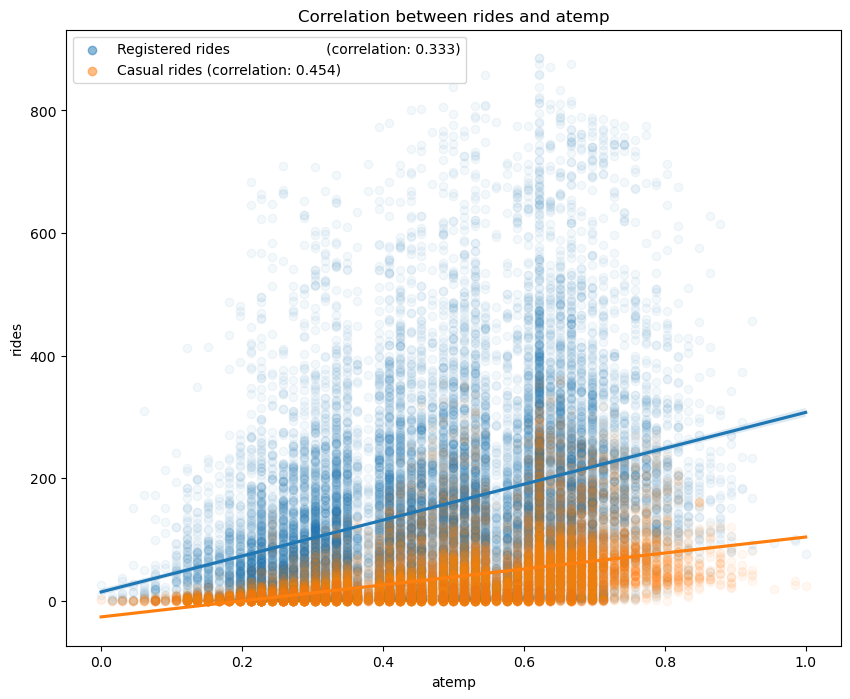

In [42]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')

plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')

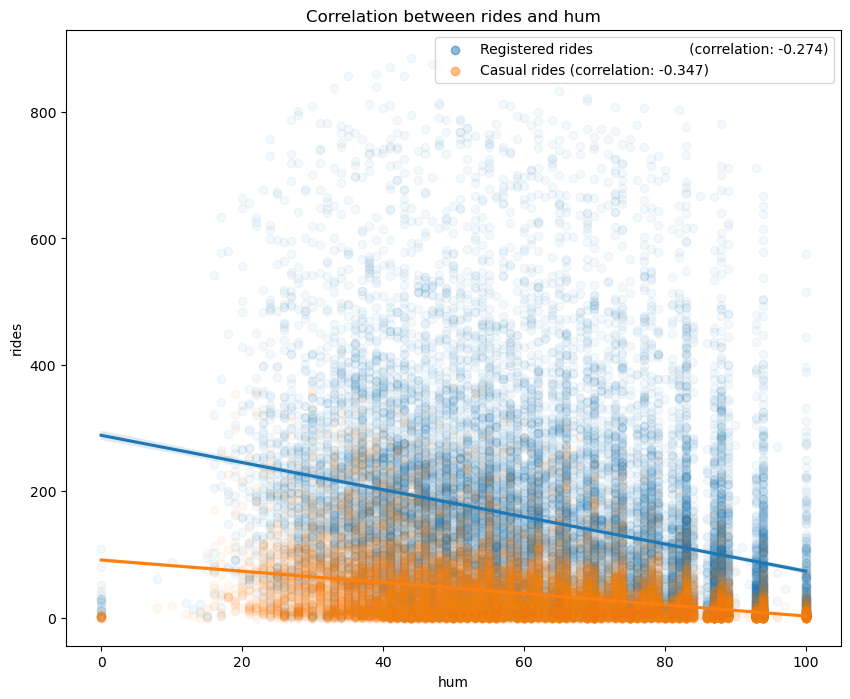

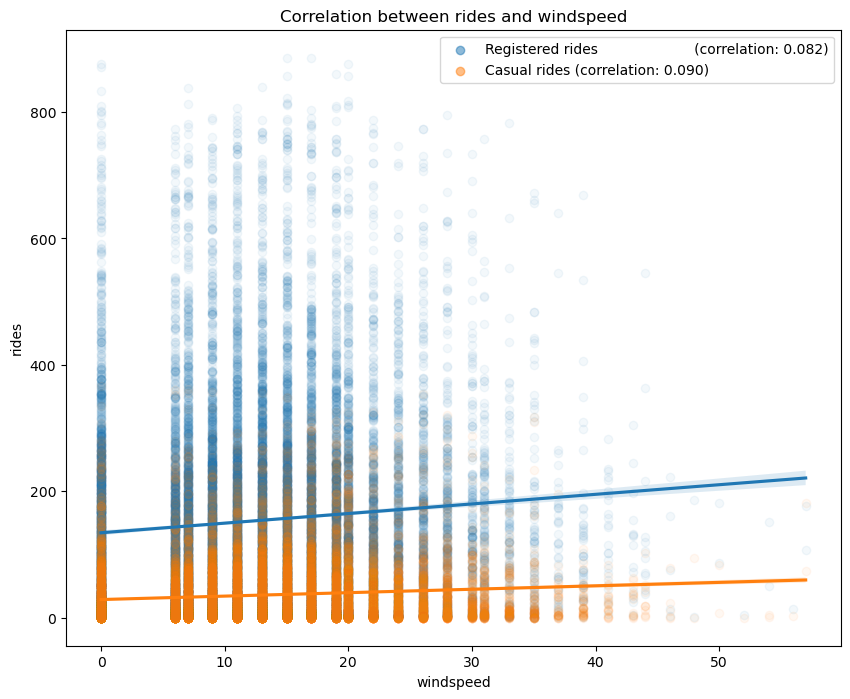

In [43]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')

In [44]:
"""
we can observe that higher temperatures have a positive impact on the number of rides 
(the correlation between registered/casual rides and temp is 0.335 and 0.46, respectively, and it's a similar case for atemp). 
 Note that as the values in the registered column are widely spread with respect to the different values in temp, we have a lower correlation compared to the casual column.
 The same pattern can be observed  in which the humidity level has a negative correlation with both types of rides (-0.274 for registered and -0.347 for casual).
 This means that with a high level of humidity (mist or rain), customers will tend not to use the bike sharing service. 
We can see that there is minimal correlation between the number of rides and the wind speed (a weak positive correlation).
"""

"\nwe can observe that higher temperatures have a positive impact on the number of rides \n(the correlation between registered/casual rides and temp is 0.335 and 0.46, respectively, and it's a similar case for atemp). \n Note that as the values in the registered column are widely spread with respect to the different values in temp, we have a lower correlation compared to the casual column.\n The same pattern can be observed  in which the humidity level has a negative correlation with both types of rides (-0.274 for registered and -0.347 for casual).\n This means that with a high level of humidity (mist or rain), customers will tend not to use the bike sharing service. \nWe can see that there is minimal correlation between the number of rides and the wind speed (a weak positive correlation).\n"

In [45]:
# define random variables
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

In [46]:
# compute correlations
from scipy.stats import pearsonr, spearmanr
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

FileNotFoundError: [Errno 2] No such file or directory: 'figs/exercise_1_05.png'

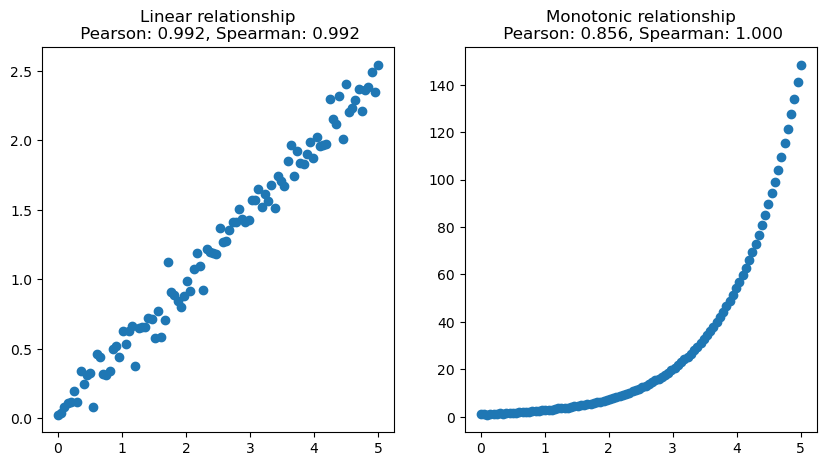

In [47]:
# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n \
Pearson: {corr_lin_pearson:.3f}, \
Spearman: {corr_lin_spearman:.3f}")
ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship\n \
Pearson: {corr_mon_pearson:.3f}, \
Spearman: {corr_mon_spearman:.3f}")
fig.savefig('figs/exercise_1_05.png', format='png')

In [48]:
# define function for computing correlations
def compute_correlations(data, col):

    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,\
                      "Spearman (registered)": spearman_reg,\
                      "Pearson (casual)": pearson_cas,\
                      "Spearman (casual)": spearman_cas})

In [49]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", \
                                "Spearman (registered)",\
                                "Pearson (casual)", \
                                "Spearman (casual)"])
for col in cols:
    corr_data[col]=compute_correlations(preprocessed_data, col)
corr_data.T

Pearson (registered)  Spearman (registered)  Pearson (casual)  \
temp                   0.335361               0.373196          0.459616   
atemp                  0.332559               0.373014          0.454080   
hum                   -0.273933              -0.338480         -0.347028   
windspeed              0.082321               0.122936          0.090287   

           Spearman (casual)  
temp                0.570989  
atemp               0.570419  
hum                -0.388213  
windspeed           0.122920

In [50]:
#As we can observe, for most of the variables, the Pearson and Spearman correlation coefficient are 
#close enough (some non-linearity is to be expected). The most striking difference between the two coefficients occurs when comparing the temp
#(and atemp) and casual columns. More precisely, the Spearman correlation is quite high, meaning that there is significant evidence for
#a nonlinear, relatively strong and positive relationship. 

#An interpretation of this result is that casual customers are far keener on using the bike sharing service when 
#temperatures are higher. We have already seen from our previous analysis that casual customers ride mostly during the weekend,
#and they do not rely on bike sharing services for commuting to work. This conclusion is again confirmed by the strong relationship 
#with temperature, as opposed to registered customers, whose rides have a weaker correlation with temperature.

FileNotFoundError: [Errno 2] No such file or directory: 'figs/correlations.png'

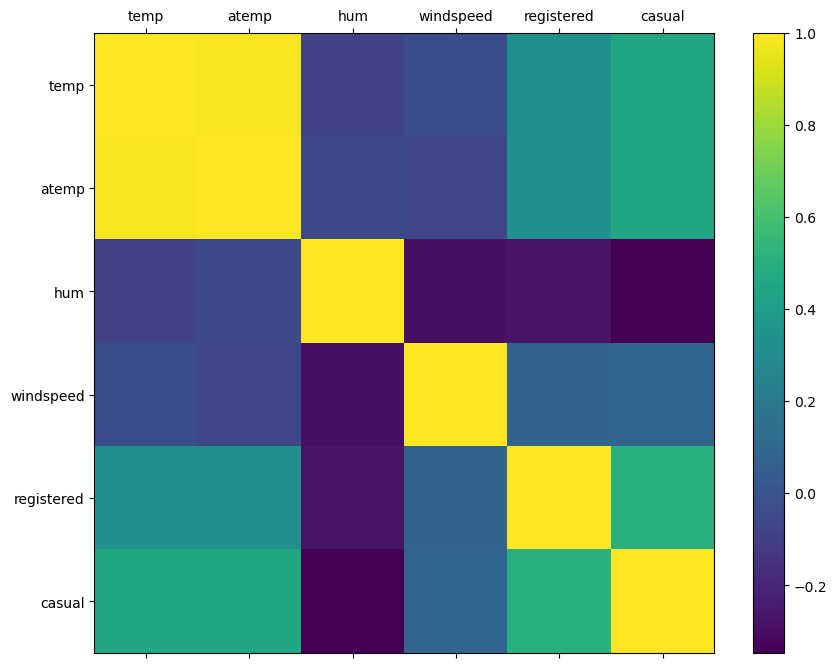

In [51]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", \
        "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
fig.savefig('figs/correlations.png', format='png')

In [52]:
"""
define function for plotting rolling statistics and ADF test for time series
"""
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts, window=10, **kwargs):
# create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()
    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]
    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

In [53]:
# get daily rides
daily_rides = preprocessed_data[["dteday", "registered", \
                                 "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()

# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

In [54]:
# subtract rolling mean
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'figs/daily_registered_diff.png'

<Figure size 640x480 with 0 Axes>

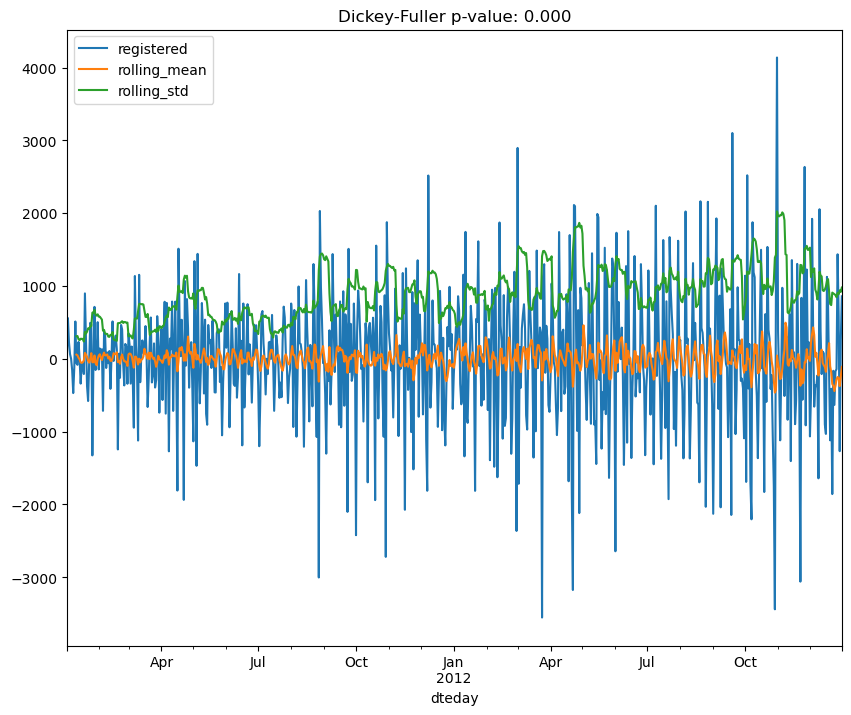

In [55]:
# subtract last value
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

plt.figure()
test_stationarity(registered_diff, figsize=(10, 8))
plt.savefig('figs/daily_registered_diff.png', format='png')

plt.figure()
test_stationarity(casual_diff, figsize=(10, 8))
plt.savefig('figs/daily_casual_diff.png', format='png')

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
registered_decomposition = seasonal_decompose(\
                           daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])

FileNotFoundError: [Errno 2] No such file or directory: 'figs/registered_decomposition.png'

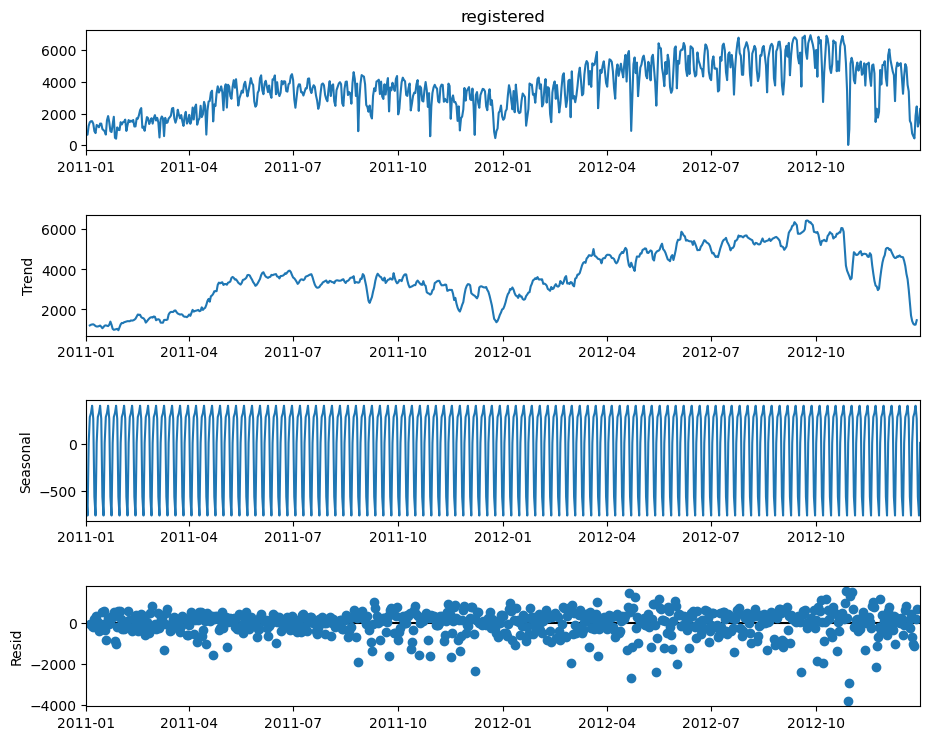

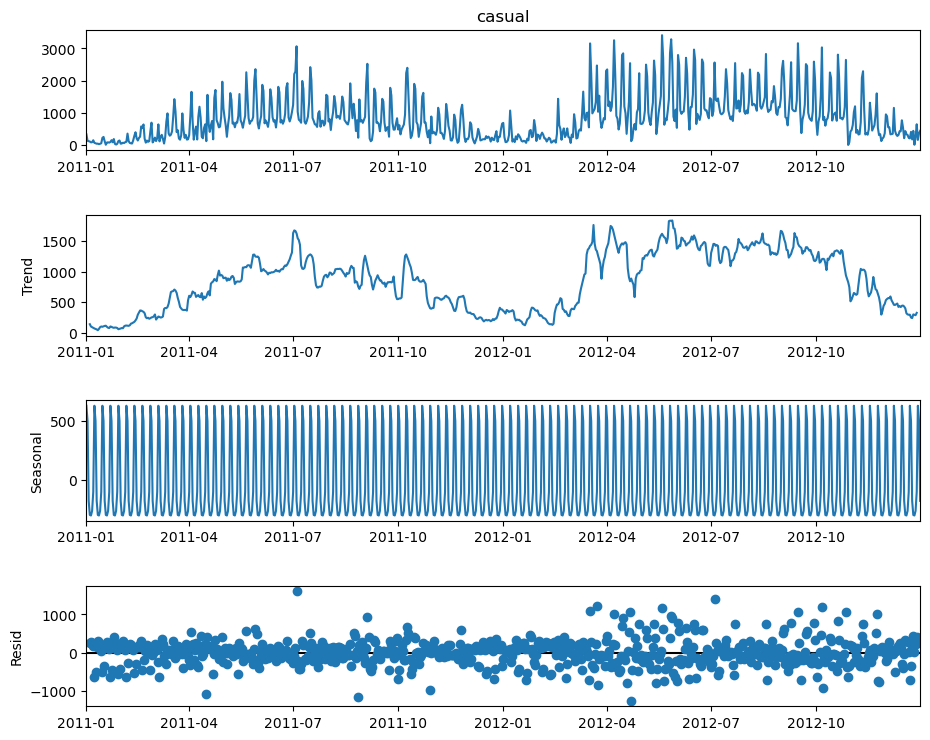

In [57]:
# plot decompositions
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)

casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

registered_plot.savefig('figs/registered_decomposition.png', \
                        format='png')
casual_plot.savefig('figs/casual_decomposition.png', \
                    format='png')

FileNotFoundError: [Errno 2] No such file or directory: 'figs/registered_resid.png'

<Figure size 640x480 with 0 Axes>

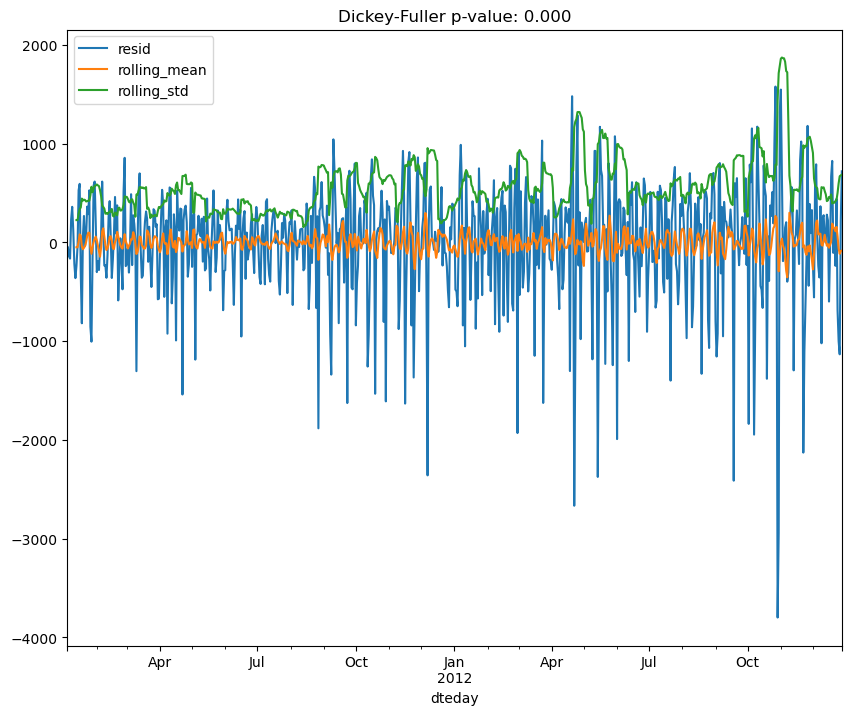

In [58]:
# test residuals for stationarity
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(), \
                  figsize=(10, 8))
plt.savefig('figs/registered_resid.png', format='png')

plt.figure()
test_stationarity(casual_decomposition.resid.dropna(), \
                  figsize=(10, 8))
plt.savefig('figs/casual_resid.png', format='png')

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\thahi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


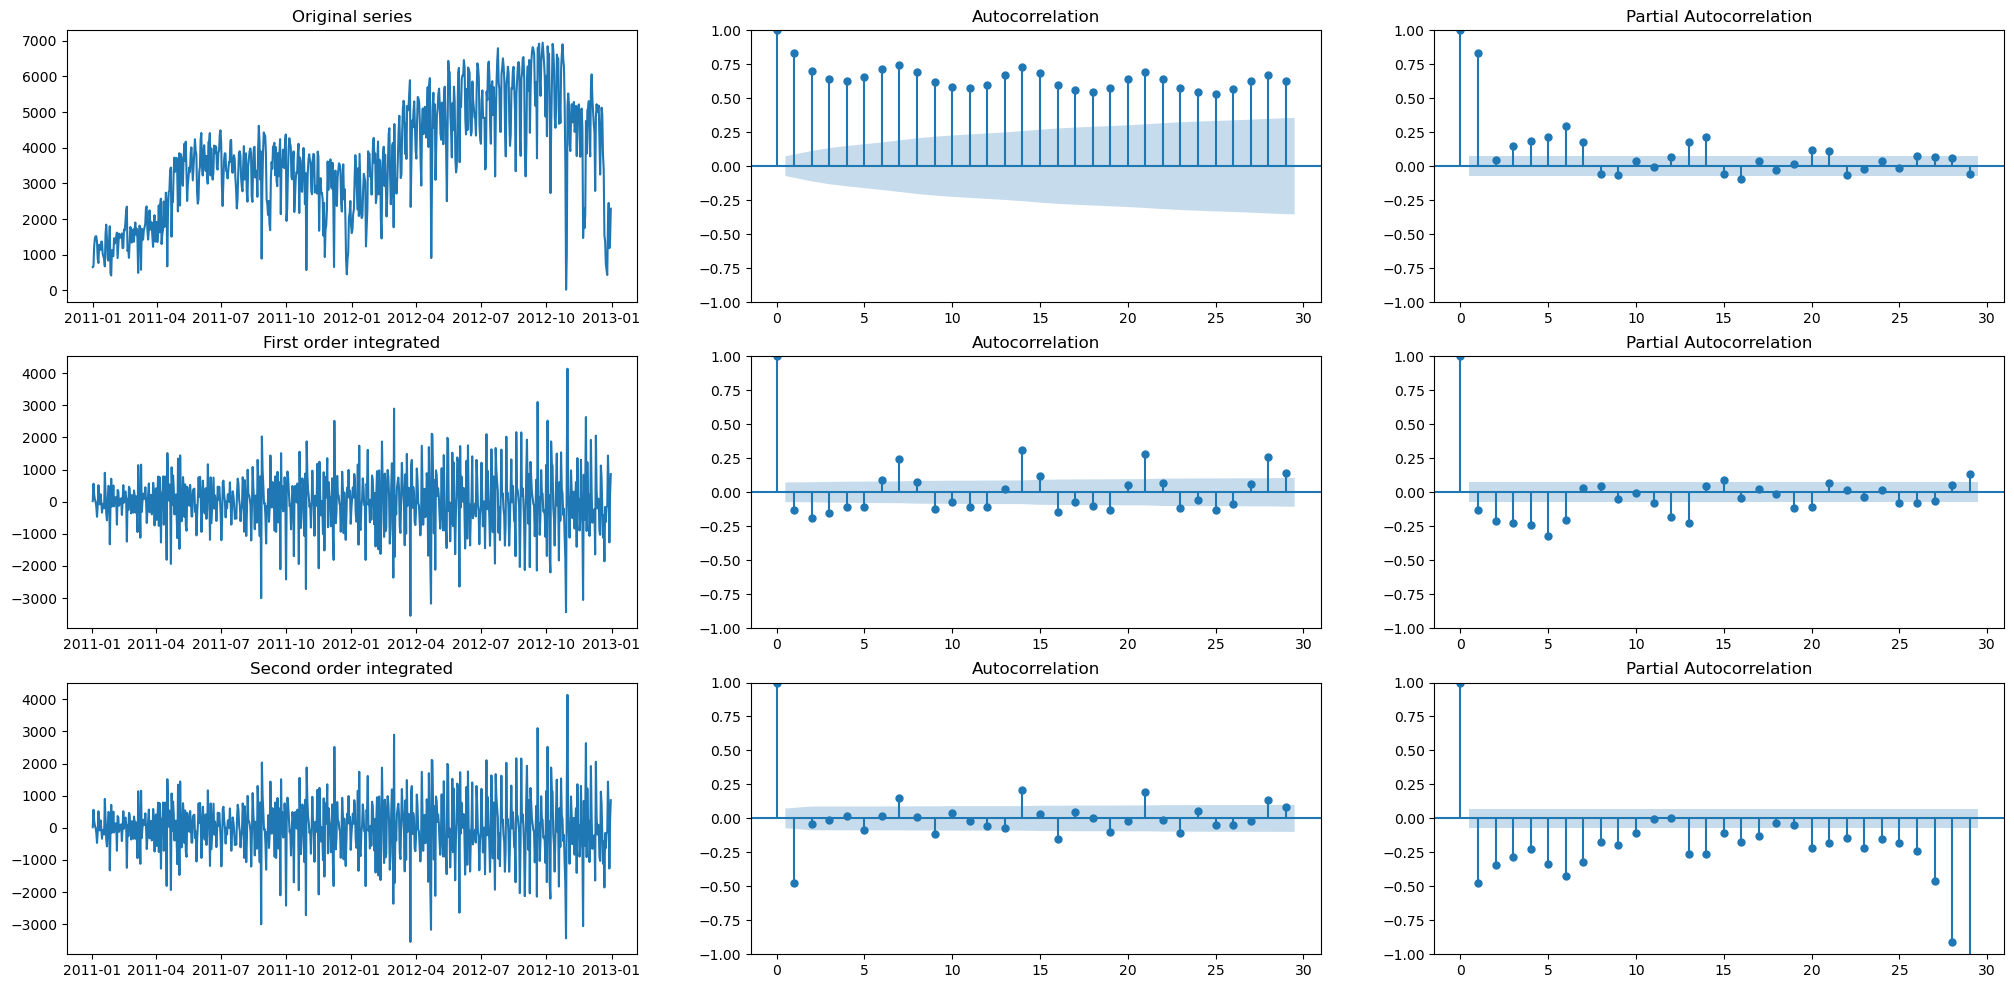

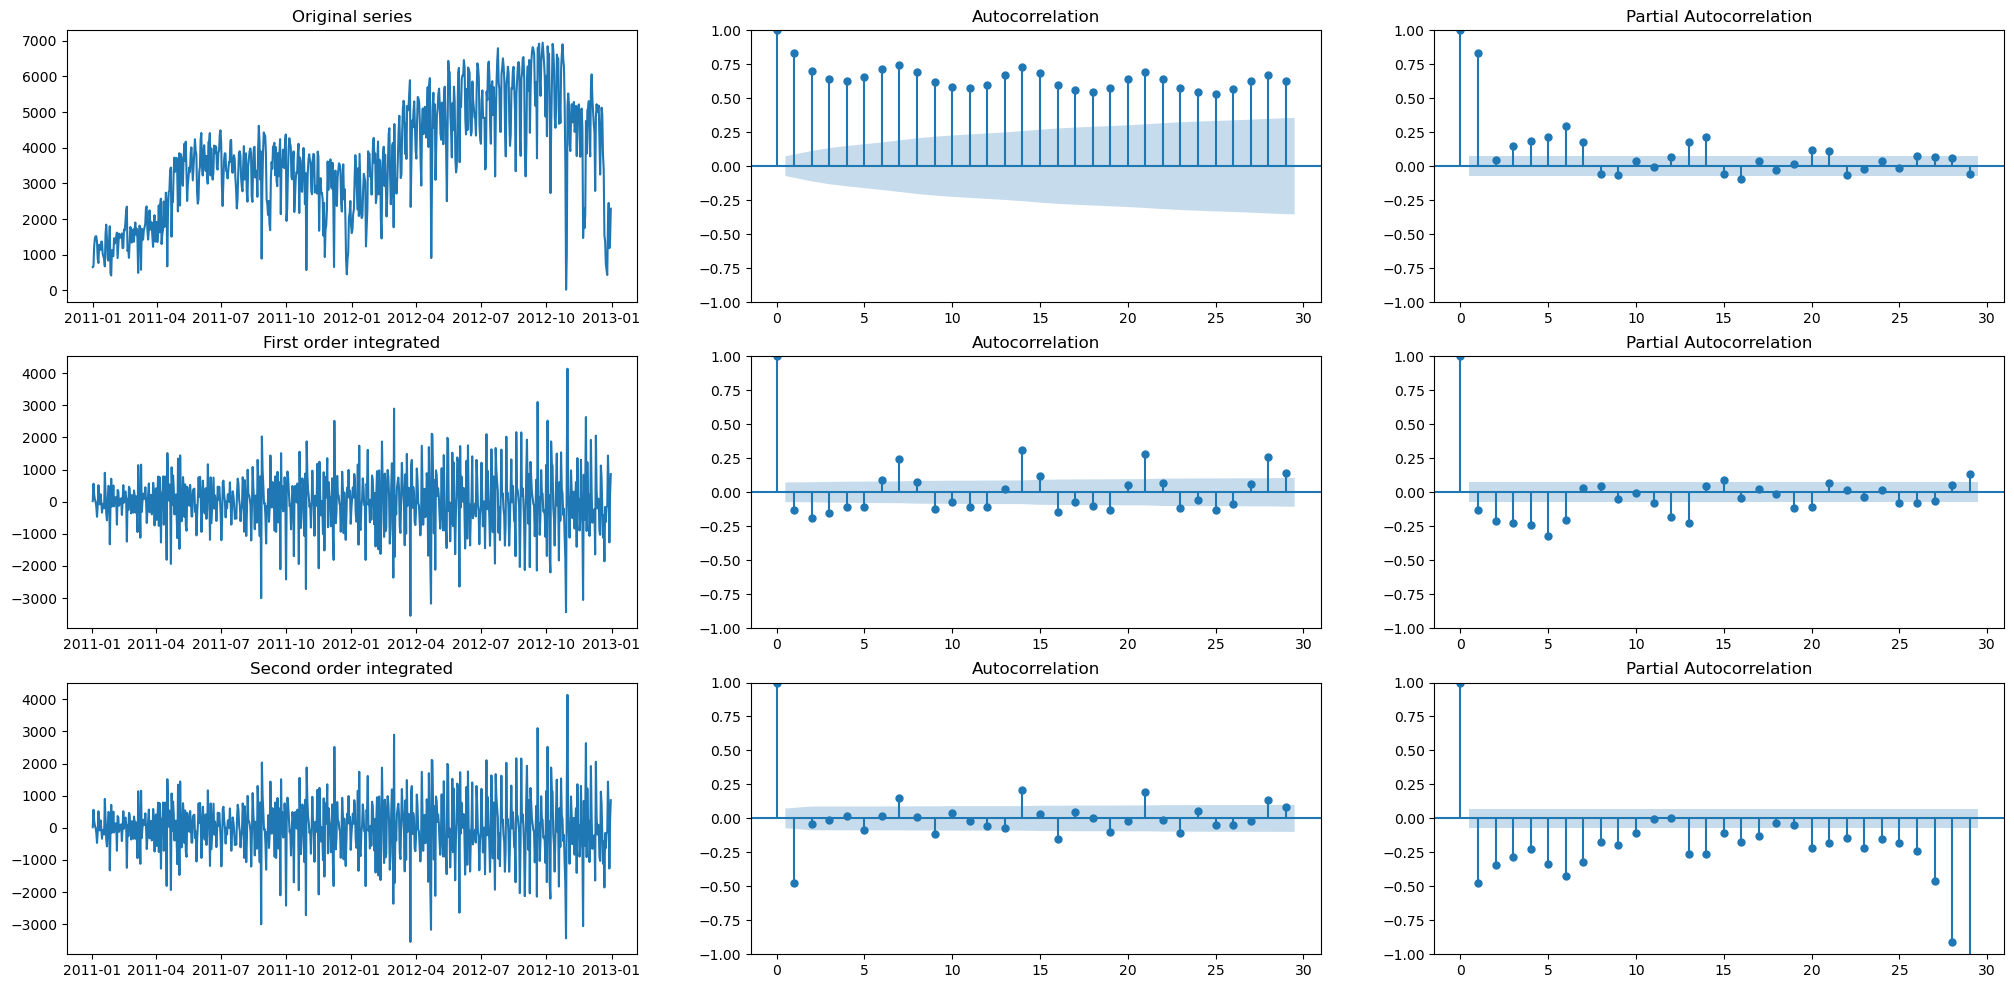

In [60]:
fig, axes = plt.subplots(3, 3, figsize=(25, 12))

# plot original series
original = daily_rides["registered"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series")
plot_acf(original, ax=axes[0,1])
plot_pacf(original, ax=axes[0,2])

# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])

# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated")
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])

In [61]:
conda install -c saravji pmdarima

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\thahi\anaconda3

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pmdarima-1.8.5             |   py39h2bbff1b_0         528 KB
    ------------------------------------------------------------
                                           Total:         528 KB

The following NEW packages will be INSTALLED:

  pmdarima           pkgs/main/win-64::pmdarima-1.8.5-py39h2bbff1b_0 




pmdarima-1.8.5       | 528 KB    |            |   0% 
pmdarima-1.8.5       | 528 KB    | 3          |   3% 
pmdarima-1.8.5       | 528 KB    | ##4        |  24% 
pmdarima-1.8.5       | 528 KB    | ######     |  61% 
pmdarima-1.8.5       | 528 KB    | ########## | 100% 
pmdarima-1.8.5       | 528 KB    | ########## | 100% 
                                                     


Prepar

In [62]:
from pmdarima import auto_arima
model = auto_arima(registered, start_p=1, start_q=1, \
                   max_p=3, max_q=3, information_criterion="aic")
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5854.502
Date:                Sun, 22 Jan 2023   AIC                          11723.004
Time:                        20:19:31   BIC                          11755.155
Sample:                             0   HQIC                         11735.408
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6063      0.050     32.357      0.000       1.509       1.704
ar.L2         -1.4458      0.062    -23.318      0.000      -1.567      -1.324
ar.L3          0.3595      0.049      7.362      0.0

FileNotFoundError: [Errno 2] No such file or directory: 'figs/registered_arima_fit.png'

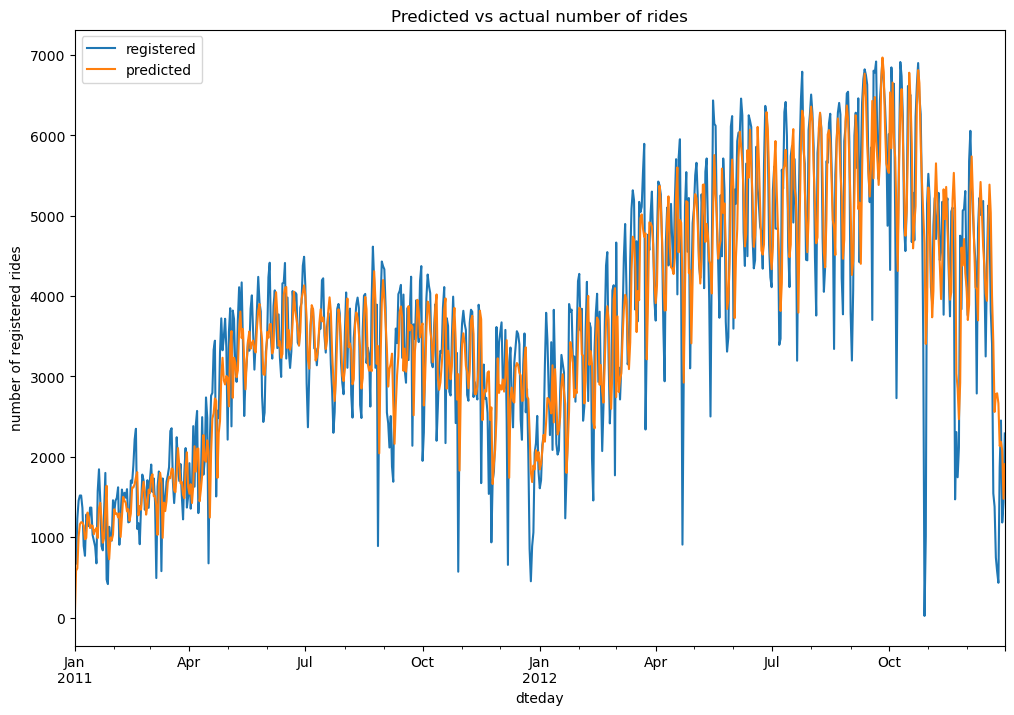

In [63]:
# plot original and predicted values
plot_data = pd.DataFrame(registered)
plot_data['predicted'] = model.predict_in_sample()
plot_data.plot(figsize=(12, 8))
plt.ylabel("number of registered rides")
plt.title("Predicted vs actual number of rides")
plt.savefig('figs/registered_arima_fit.png', format='png')

In [64]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline
# load hourly data
data = pd.read_csv('D:\Datasets\Bike sharing Dataset\hour.csv')

In [65]:
# create new column by encoding the weathersit one
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
data['weather'] = data['weathersit']\
                  .apply(lambda x: weather_mapping[x])

In [66]:
"""
define a function for creating a regression plot for a specified weather 
condition
"""
def create_regression_plot(data, col, weather_cond):
    # extract data for the specific weather condition
    plot_data = data[data['weather'] == weather_cond]
    # create regplot for registered users
    ax = sns.regplot(x=col, y="registered", data=plot_data, \
                     scatter_kws={"alpha":0.05})
    # create regplot for casual users
    ax = sns.regplot(x=col, y="casual", data=plot_data, \
                     scatter_kws={"alpha":0.05})
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"{col} | {weather_cond}")
    return ax

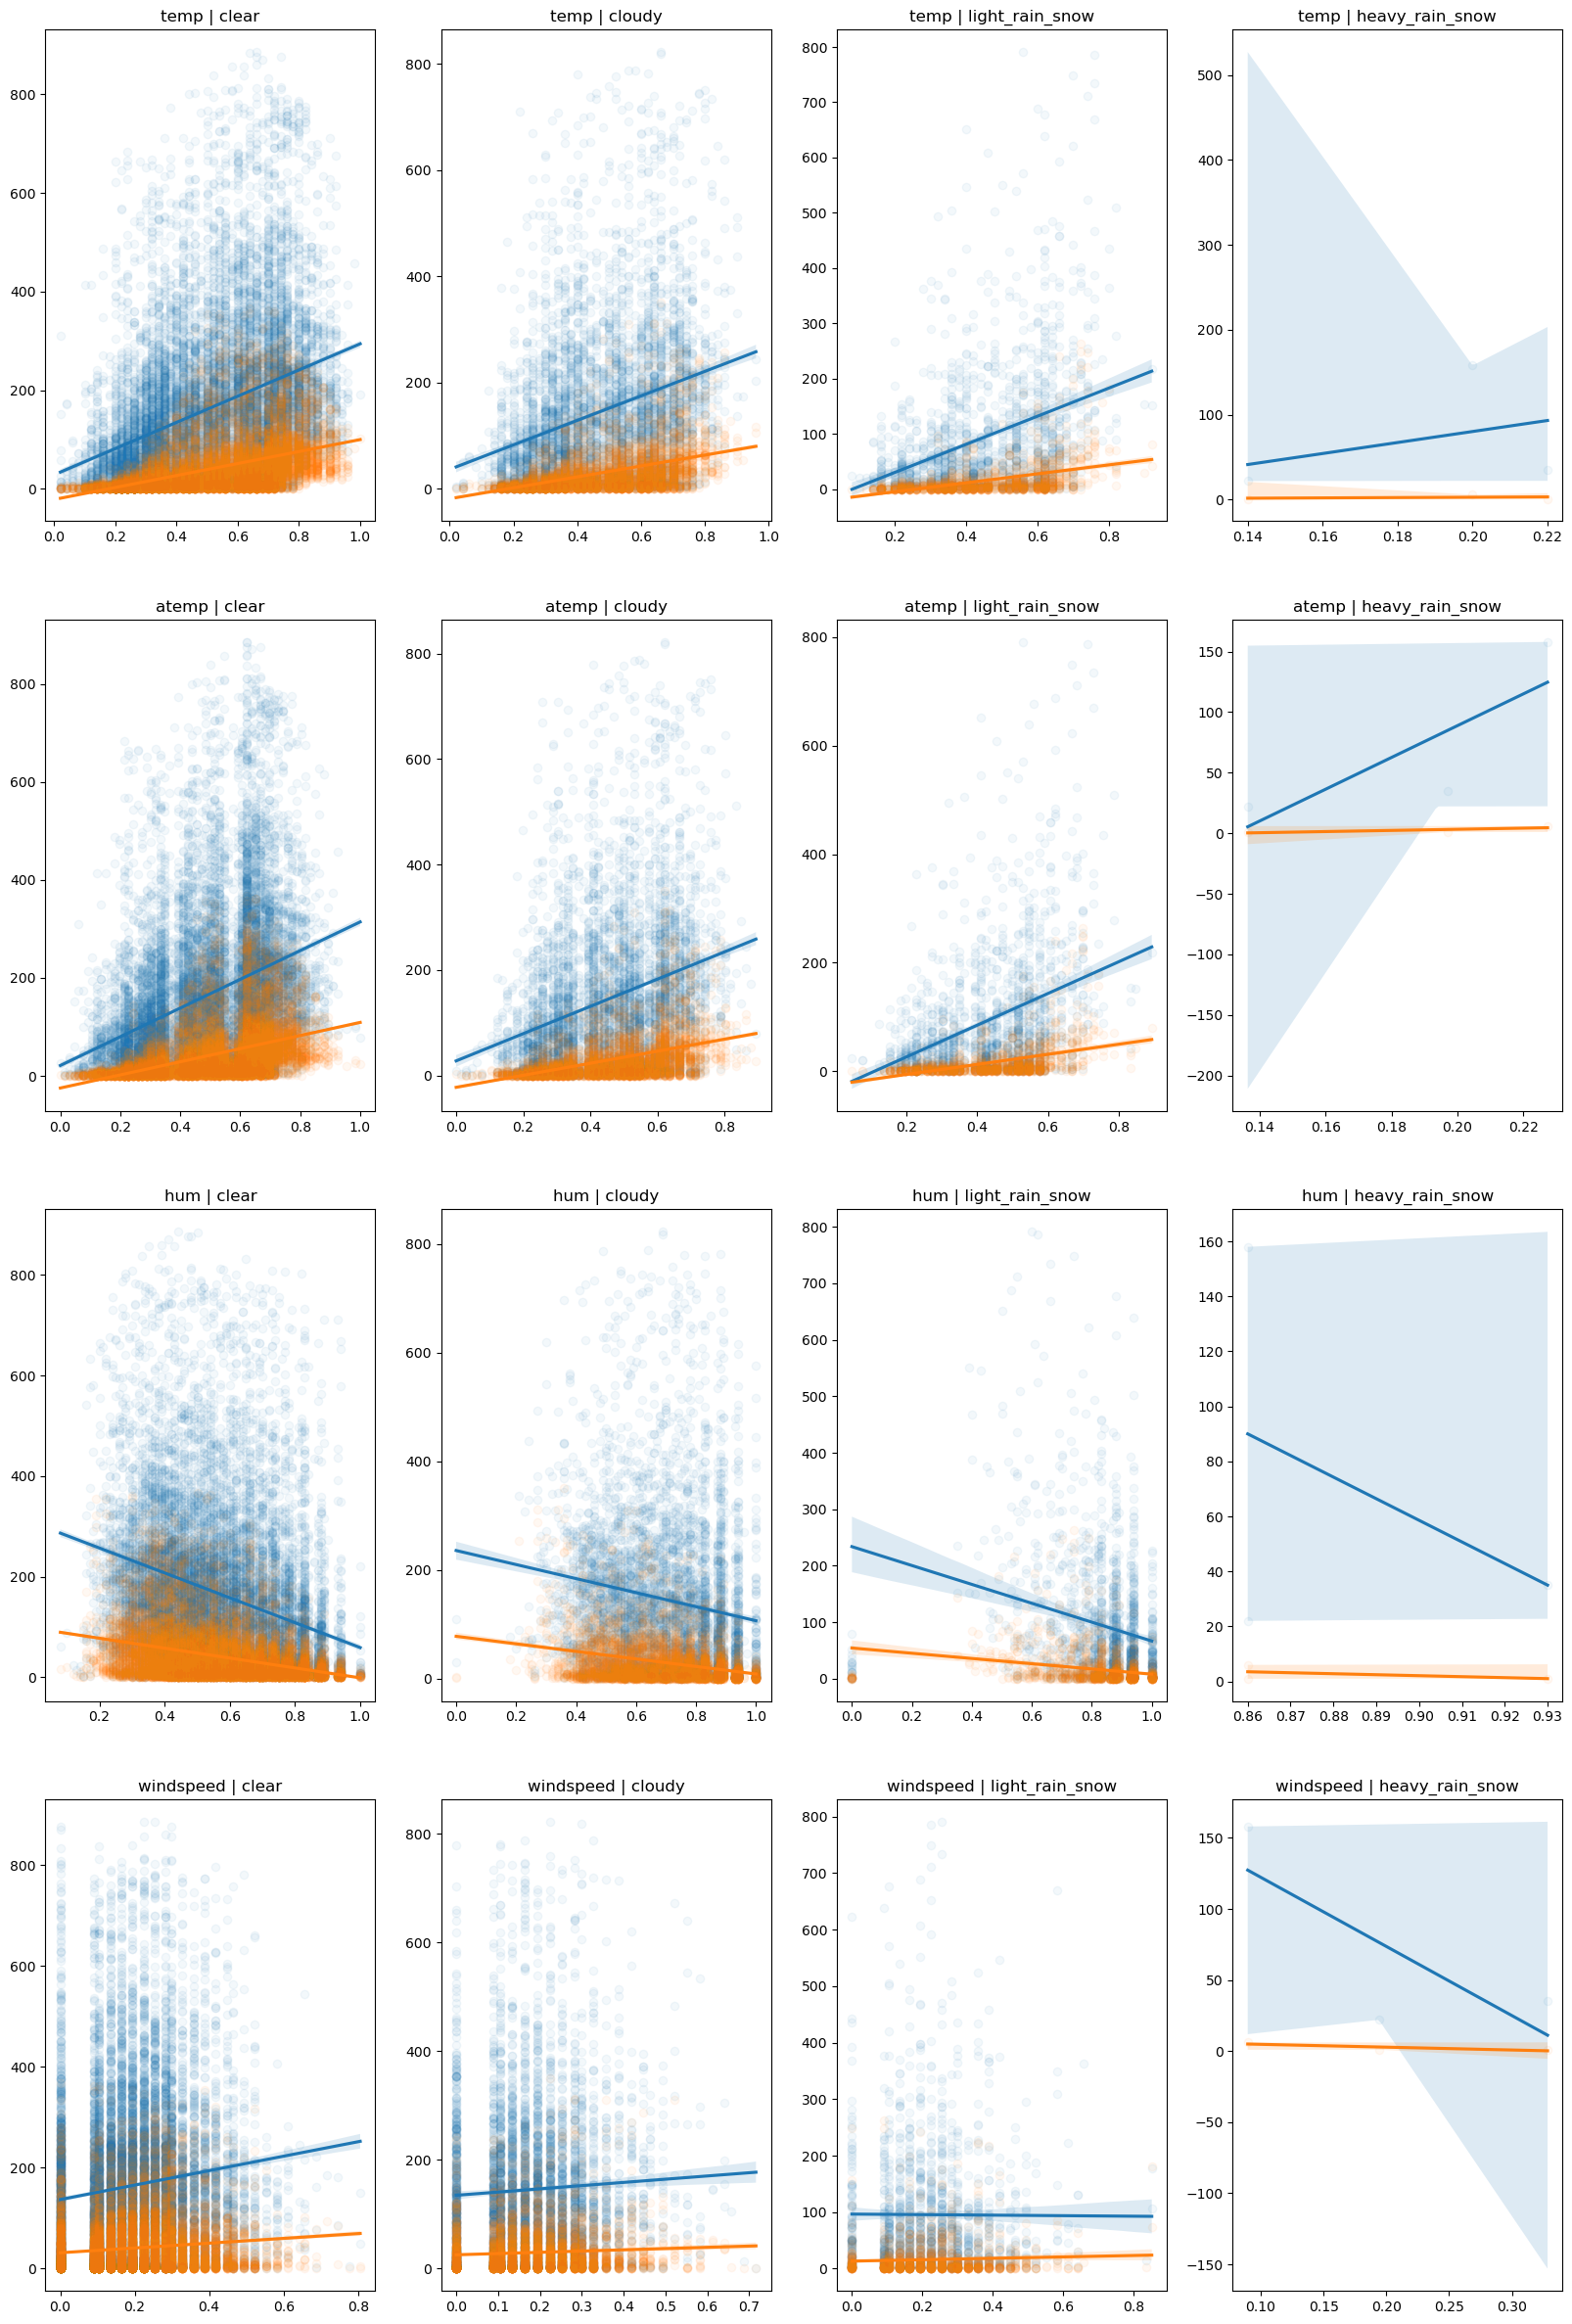

In [67]:
weather_conditions = data.weather.unique()
columns = ["temp", "atemp", "hum", "windspeed"]
plt.figure(figsize=(20,30))
for col_index, col in enumerate(columns):
    for row_index, weather_cond in enumerate(weather_conditions):
        plot_number = row_index + col_index*4 + 1
        plt.subplot(4,4,plot_number)
        create_regression_plot(data, col, weather_cond)

In [68]:
# create function for computing pearson correlation 
def print_correlations(data, col, weather_cond):
    # extract data for the specific weather condition
    corr_data = data[data['weather'] == weather_cond]

    # compute pearson correlation between col and registered rides
    pearson_corr_r = pearsonr(corr_data[col], \
                              corr_data["registered"])

    # compute pearson correlation between col and registered rides
    pearson_corr_c = pearsonr(corr_data[col], corr_data["casual"])

    # print correlations
    print(f"Pearson correlation (registered, {col}): \
corr={pearson_corr_r[0]:.03f}, pval={pearson_corr_r[1]:.03f}")
    print(f"Pearson correlation (casual, {col}): \
corr={pearson_corr_c[0]:.03f}, pval={pearson_corr_c[1]:.03f}")

In [69]:
"""
print correlations for temp, atemp, hum and windspeed columns 
with registered and casual rides
"""
weather_conditions = data.weather.unique()
columns = ["temp", "atemp", "hum", "windspeed"]
for col in columns:
    for weather_cond in weather_conditions:
        print_correlations(data, col, weather_cond)

Pearson correlation (registered, temp): corr=0.340, pval=0.000
Pearson correlation (casual, temp): corr=0.459, pval=0.000
Pearson correlation (registered, temp): corr=0.285, pval=0.000
Pearson correlation (casual, temp): corr=0.437, pval=0.000
Pearson correlation (registered, temp): corr=0.356, pval=0.000
Pearson correlation (casual, temp): corr=0.433, pval=0.000
Pearson correlation (registered, temp): corr=0.360, pval=0.766
Pearson correlation (casual, temp): corr=0.277, pval=0.821
Pearson correlation (registered, atemp): corr=0.334, pval=0.000
Pearson correlation (casual, atemp): corr=0.451, pval=0.000
Pearson correlation (registered, atemp): corr=0.285, pval=0.000
Pearson correlation (casual, atemp): corr=0.434, pval=0.000
Pearson correlation (registered, atemp): corr=0.366, pval=0.000
Pearson correlation (casual, atemp): corr=0.445, pval=0.000
Pearson correlation (registered, atemp): corr=0.810, pval=0.399
Pearson correlation (casual, atemp): corr=0.756, pval=0.454
Pearson correlat

In [70]:
#we studied a business problem related to bike sharing services. We started by presenting some of the main visual 
#techniques in data analysis, such as bar plots, scatter plots, and time series visualizations. We also analyzed customer behaviors 
#based on different time frames and weather conditions. We introduced the reader to hypothesis testing and some of its main applications.
#Finally, we presented the basics of time series analysis, and how to identify the best time series models when dealing with nonstationary time series.